# Lab 8: PCA with Academic Performance

**Objective:** Understand how Principal Component Analysis (PCA) finds latent structure among correlated variables and down-weights variables that are uncorrelated with the main pattern in the data.

**Scenario:** We measure four scores for 100 students:
- **Math** (0–100)
- **Science** (0–100)
- **English** (0–100)
- **Music** (0–100) — intentionally designed to be **uncorrelated** with the other subjects

We expect Math/Science/English to be correlated via an underlying "academic ability" factor, while Music varies independently.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.random.seed(42)
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')


## 1. Explore the Data

Our data file, `grades.csv`, contains grades for 100 students across the four classes.  Let's explore them for potential correlation.

In [21]:
grades.shape

(100, 4)

In [7]:
grades = pd.read_csv('grades.csv')
grades.head()

,Math,Science,English,Music
0,72.890,81.756,75.822,54.056
1,71.514,76.421,70.816,64.006
2,79.763,86.892,85.213,70.052
3,86.219,95.499,93.282,70.470
4,71.852,65.770,72.554,65.499


In [8]:
grades.isnull().sum()

Math       0
Science    0
English    0
Music      0
dtype: int64

In [9]:
corr = grades.corr(numeric_only=True)
corr

,Math,Science,English,Music
Math,1.000,0.770,0.764,-0.034
Science,0.770,1.000,0.791,-0.159
English,0.764,0.791,1.000,-0.031
Music,-0.034,-0.159,-0.031,1.000


Just as expected:
* Math - Science has a correlation of 0.770
* Math - English as a correlation of 0.764
* Science - English has a correlation of 0.791

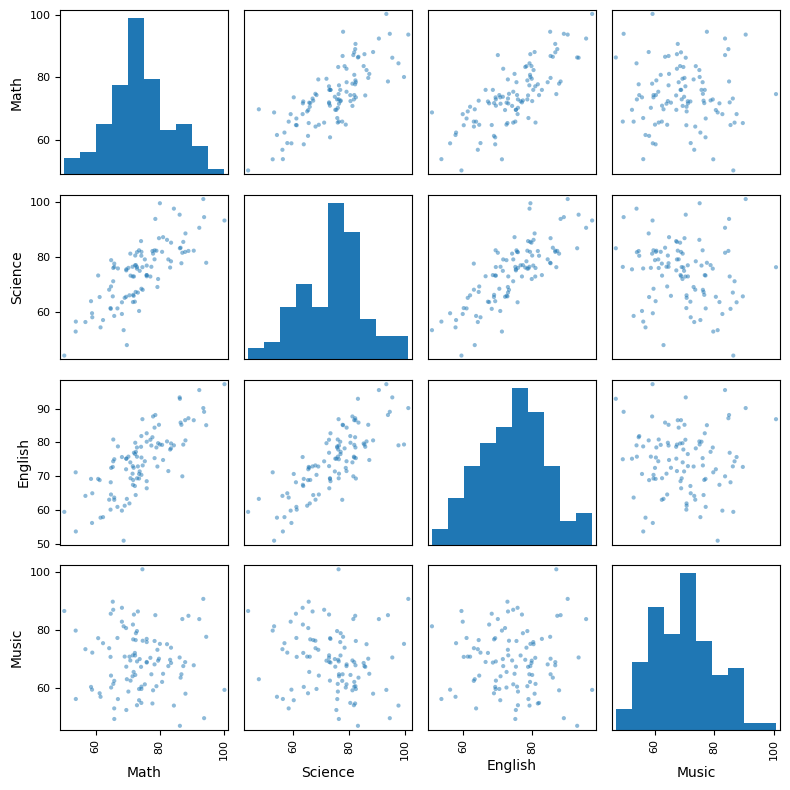

In [10]:
# Scatter matrix to visualize pairwise relationships (matplotlib only)
axarr = scatter_matrix(grades, figsize=(8,8), diagonal='hist')
plt.tight_layout()
plt.show()


## 2. Standardize the data so we can do PCA

PCA is sensitive to scale, so we have to standardize each column to hav ea mean of 0 and standard deviation of 1.

In [12]:
# The "standard" scaler does hte work for us and returns a numpy array
scaler = StandardScaler()
grades_scaled = scaler.fit_transform(grades)
grades_scaled[:5]

array([[-0.12300204,  0.65680087,  0.14182849, -1.45353897],
       [-0.26611539,  0.1877418 , -0.39340698, -0.51338948],
       [ 0.59175748,  1.10838624,  1.14598007,  0.05786873],
       [ 1.26310688,  1.8651664 ,  2.0087352 ,  0.09730275],
       [-0.23097475, -0.74875525, -0.2076243 , -0.37231825]])

## 3. Fit PCA and look at the variance explained

The Explained Variance Ratio tells us how much each of these newly created "principal components" explains the total variance.

We look at them sorted highest to lowest to pick the components we'll use.  In this case, the top two (PC1, PC2) explain 90% of the variance.

In [13]:
pca = PCA()
pca.fit(grades_scaled)

explained = pca.explained_variance_ratio_

ev = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained))],
    'Explained Variance Ratio': explained
})
ev

,PC,Explained Variance Ratio
0,PC1,0.640
1,PC2,0.251
2,PC3,0.060
3,PC4,0.049


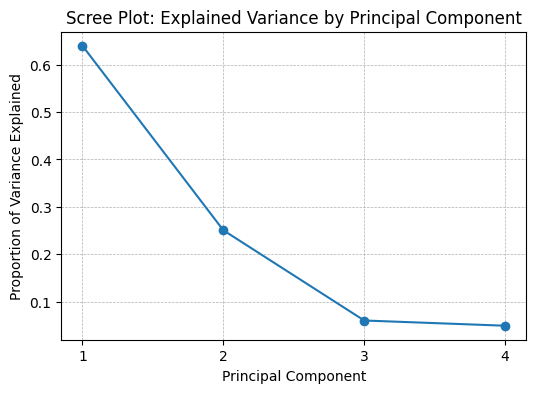

In [18]:

# Scree plot (variance explained by each PC)
plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot: Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
# Loadings = eigenvectors of covariance of standardized data
loadings = pd.DataFrame(
    pca.components_.T,
    index=grades.columns,
    columns=[f'PC{i+1}' for i in range(len(grades.columns))]
)
loadings


,PC1,PC2,PC3,PC4
Math,0.570,0.099,0.798,-0.167
Science,0.581,-0.057,-0.246,0.774
English,0.575,0.101,-0.548,-0.599
Music,-0.083,0.988,-0.038,0.123


The "components" tell us how much each of the original features contributes to each PC.
* PC1 is mostly a mix of Math, Science, and English
* PC2 is almost entirely Music

### 4. Project original data onto PC1, PC2

Now that we know we can use just two PCs to explain most of the variance, we'll redo the PCA with n_components=2.

In the graph, the x-axis is mostly a combination of Math, English, and Science; the y-axis is mostly Music.

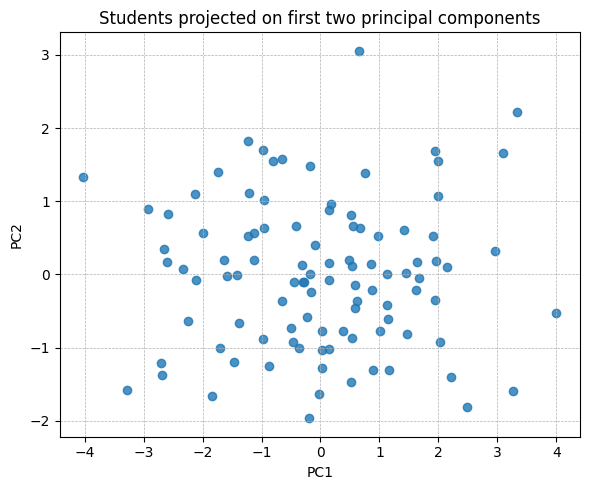

,PC1,PC2
0,0.513,-1.472
1,-0.226,-0.584
2,1.636,0.169
3,2.951,0.319
4,-0.655,-0.369


In [ ]:
# Since 
pca2 = PCA(n_components=2)
PCs = pca2.fit_transform(grades_scaled)
pc_df = pd.DataFrame(PCs, columns=['PC1','PC2'])

plt.figure(figsize=(6,5))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.8)
plt.title('Students projected on first two principal components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

pc_df.head()
